In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
data = pd.read_csv(url, header=None, na_values='?')

In [4]:
data.shape

(690, 16)

In [6]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,0.0,0,-


In [7]:
data.columns = ['A' + str(i) for i in range(1, 16)] + ['class']
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [8]:
data['A5'][687]

'p'

In [9]:
data.at[687, 'A5']

'p'

In [10]:
data.describe()

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [12]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print (categorical_columns)
print (numerical_columns)

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'class']
['A2', 'A3', 'A8', 'A11', 'A14', 'A15']


In [14]:
data[categorical_columns].describe()
data.describe(include=[object])

,A1,A4,A5,A6,A7,A9,A10,A12,A13,class
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


In [15]:
for c in categorical_columns:
    print (data[c].unique())

['b' 'a' nan]
['u' 'y' nan 'l']
['g' 'p' nan 'gg']
['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' nan]
['v' 'h' 'bb' 'ff' 'j' 'z' nan 'o' 'dd' 'n']
['t' 'f']
['t' 'f']
['f' 't']
['g' 's' 'p']
['+' '-']


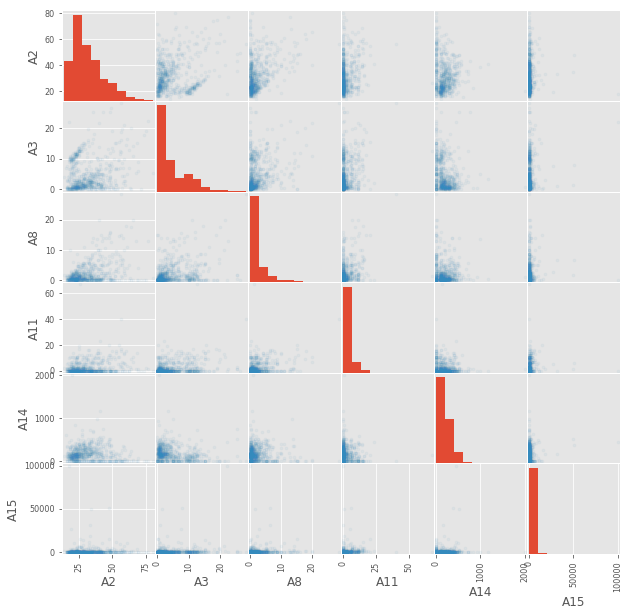

In [16]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha=0.05, figsize=(10, 10));

In [17]:
data.corr()

,A2,A3,A8,A11,A14,A15
A2,1.000000,0.202317,0.395751,0.185912,-0.079812,0.018553
A3,0.202317,1.000000,0.298902,0.271207,-0.224242,0.123121
A8,0.395751,0.298902,1.000000,0.322330,-0.077163,0.051345
A11,0.185912,0.271207,0.322330,1.000000,-0.120096,0.063692
A14,-0.079812,-0.224242,-0.077163,-0.120096,1.000000,0.066853
A15,0.018553,0.123121,0.051345,0.063692,0.066853,1.000000


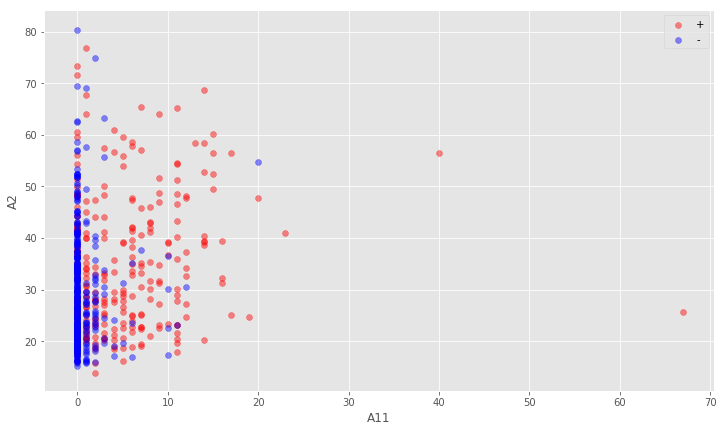

In [33]:
def draw_diagram_two_columns(col1, col2):
    plt.figure(figsize=(12, 7))

    plt.scatter(data[col1][data['class'] == '+'],
            data[col2][data['class'] == '+'],
            alpha=0.45,
            color='red',
            label='+')

    plt.scatter(data[col1][data['class'] == '-'],
            data[col2][data['class'] == '-'],
            alpha=0.45,
            color='blue',
            label='-')

    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend(loc='best')
draw_diagram_two_columns('A11', 'A2')

## Готовим данные

In [36]:
data.count(axis=0)

A1       678
A2       678
A3       690
A4       684
A5       684
A6       681
A7       681
A8       690
A9       690
A10      690
A11      690
A12      690
A13      690
A14      677
A15      690
class    690
dtype: int64

In [37]:
data = data.fillna(data.median(axis=0), axis=0)

In [38]:
data.count(axis=0)

A1       678
A2       690
A3       690
A4       684
A5       684
A6       681
A7       681
A8       690
A9       690
A10      690
A11      690
A12      690
A13      690
A14      690
A15      690
class    690
dtype: int64

In [42]:
data_describe = data.describe(include=[object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [43]:
data.describe(include=['object'])

,A1,A4,A5,A6,A7,A9,A10,A12,A13,class
count,690,690,690,690,690,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,480,525,525,146,408,361,395,374,625,383


In [44]:
data.describe()

,A2,A3,A8,A11,A14,A15
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,31.514116,4.758725,2.223406,2.40000,183.562319,1017.385507
std,11.860245,4.978163,3.346513,4.86294,172.190278,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,80.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,272.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


## Векторизация

In [45]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print (binary_columns, nonbinary_columns)

['A1', 'A9', 'A10', 'A12', 'class'] ['A4', 'A5', 'A6', 'A7', 'A13']


In [46]:
for c in binary_columns:
    top = data_describe[c]['top']
    top_items = data[c] == top
    data.loc[top_items, c] = 0
    data.loc[np.logical_not(top_items), c] = 1

In [48]:
data[binary_columns].describe()

,A1,A9,A10,A12,class
count,690,690,690,690,690
unique,2,2,2,2,2
top,0,0,0,0,0
freq,480,361,395,374,383




Заменим признак A4 тремя признаками: A4_u, A4_y, A4_l.

    Если признак A4 принимает значение u, то признак A4_u равен 1, A4_y равен 0, A4_l равен 0.
    Если признак A4 принимает значение y, то признак A4_y равен 0, A4_y равен 1, A4_l равен 0.
    Если признак A4 принимает значение l, то признак A4_l равен 0, A4_y равен 0, A4_l равен 1.

Такую векторизацию осуществляет в pandas метод get_dummies:


In [49]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print (data_nonbinary.columns)

Index(['A4_l', 'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c',
       'A6_cc', 'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m',
       'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h',
       'A7_j', 'A7_n', 'A7_o', 'A7_v', 'A7_z', 'A13_g', 'A13_p', 'A13_s'],
      dtype='object')


In [51]:
data_nonbinary.head()

,A4_l,A4_u,A4_y,A5_g,A5_gg,A5_p,A6_aa,A6_c,A6_cc,A6_d,...,A7_ff,A7_h,A7_j,A7_n,A7_o,A7_v,A7_z,A13_g,A13_p,A13_s
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


## Нормализация количественных признаков¶

In [52]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()

,A2,A3,A8,A11,A14,A15
count,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02
mean,-2.581751e-15,2.085288e-16,1.879334e-16,2.067589e-16,4.827057e-17,-1.448117e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.497787e+00,-9.559198e-01,-6.643947e-01,-4.935286e-01,-1.066043e+00,-1.952717e-01
25%,-7.456942e-01,-7.550425e-01,-6.150897e-01,-4.935286e-01,-6.014412e-01,-1.952717e-01
50%,-2.575087e-01,-4.035072e-01,-3.655762e-01,-4.935286e-01,-1.368388e-01,-1.943120e-01
75%,5.221970e-01,4.919034e-01,1.200038e-01,1.233822e-01,5.136044e-01,-1.193615e-01
max,4.109180e+00,4.668645e+00,7.851932e+00,1.328414e+01,1.054901e+01,1.899821e+01


## Соединяем все в одну таблицу

In [53]:
data = pd.concat((data_numerical, data[binary_columns], data_nonbinary), axis=1)
data = pd.DataFrame(data, dtype=float)
print (data.shape)
print (data.columns)

(690, 43)
Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A1', 'A9', 'A10', 'A12',
       'class', 'A4_l', 'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa',
       'A6_c', 'A6_cc', 'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k',
       'A6_m', 'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A7_bb', 'A7_dd', 'A7_ff',
       'A7_h', 'A7_j', 'A7_n', 'A7_o', 'A7_v', 'A7_z', 'A13_g', 'A13_p',
       'A13_s'],
      dtype='object')


In [54]:
X = data.drop(('class'), axis=1)  # Выбрасываем столбец 'class'.
y = data['class']
feature_names = X.columns
print (feature_names)

Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A1', 'A9', 'A10', 'A12', 'A4_l',
       'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c', 'A6_cc',
       'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m', 'A6_q', 'A6_r',
       'A6_w', 'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h', 'A7_j', 'A7_n',
       'A7_o', 'A7_v', 'A7_z', 'A13_g', 'A13_p', 'A13_s'],
      dtype='object')


In [56]:
print (X.shape)
print (y.shape)
N, d = X.shape

(690, 42)
(690,)


## Обучающая и тестовая выборки

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print (N_train, N_test)

483 207


## kNN – метод ближайших соседей

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [60]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print (err_train, err_test)

0.146997929607 0.169082125604


Попробуем уменьшить тестовую ошибку, варьируя параметры метода.

Основной параметр метода k
ближайших соседей – это k

Поиск оптимальных значений параметров можно осуществить с помощью класса GridSearchCV – поиск наилучшего набора параметров, доставляющих минимум ошибке перекрестного контроля (cross-validation). По умолчанию рассматривается 3-кратный перекрестный контроль.

Например, найдем наилучшее значение k
среди значений [1, 3, 5, 7, 10, 15]:

In [62]:
from sklearn.model_selection import GridSearchCV
n_neighbors_array = [1, 3, 5, 7, 10, 15]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print (best_cv_err, best_n_neighbors)

0.207039337474 7


В качестве оптимального метод выбрал значение k

равное 7. Ошибка перекрестного контроля составила 20.7%, что даже больше ошибки на тестовой выборке для 5 ближайших соседей. Это может быть обусленно тем, что для построения моделей в рамках схемы перекрестного контроля используются не все данные.

Проверим, чему равны ошибки на обучающей и тестовой выборках при этом значении параметра

In [63]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))
print (err_train, err_test)

0.151138716356 0.164251207729


## SVC – машина опорных векторов

Следующий метод, который мы попробуем – машина опорных векторов (SVM – support vector machine или SVC – support vector classifier) – сразу приводит к более оптимистичным результатам.

Уже со значением параметров по умолчанию (в частности, ядро – радиальное rbf) получаем более низкую ошибку на обучающей выборке:

In [65]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print (err_train, err_test)

0.144927536232 0.130434782609


С помощью подбора параметров попробуем ее еще уменьшить.
Радиальное ядро¶

Вначале попробуем найти лучшие значения параметров для радиального ядра.


In [66]:
from sklearn.grid_search import GridSearchCV
C_array = np.logspace(-3, 3, num=7)
gamma_array = np.logspace(-5, 2, num=8)
svc = SVC(kernel='rbf')
grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array})
grid.fit(X_train, y_train)
print(C_array)
print ('CV error    = ', 1 - grid.best_score_)
print ('best C      = ', grid.best_estimator_.C)
print ('best gamma  = ', grid.best_estimator_.gamma)

[  1.00000000e-03   1.00000000e-02   1.00000000e-01   1.00000000e+00
   1.00000000e+01   1.00000000e+02   1.00000000e+03]
CV error    =  0.13871635610766042
best C      =  1.0
best gamma  =  0.01




Получили ошибку перекрестного контроля в 13.9%.

Посмотрим, чему равна ошибка на тестовой выборке при найденных значениях параметров алгоритма:


In [67]:
svc = SVC(kernel='rbf', C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print (err_train, err_test)

0.134575569358 0.111111111111



Линейное ядро¶

Теперь рассмотрим линейное ядро.


In [68]:
from sklearn.grid_search import GridSearchCV
C_array = np.logspace(-3, 3, num=7)
svc = SVC(kernel='linear')
grid = GridSearchCV(svc, param_grid={'C': C_array})
grid.fit(X_train, y_train)
print ('CV error    = ', 1 - grid.best_score_)
print ('best C      = ', grid.best_estimator_.C)

CV error    =  0.15113871635610765
best C      =  0.1


In [69]:
svc = SVC(kernel='linear', C=grid.best_estimator_.C)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print (err_train, err_test)

0.151138716356 0.125603864734



Полиномиальное ядро¶

Попробуем также полиномиальное ядро:


In [71]:
from sklearn.grid_search import GridSearchCV
C_array = np.logspace(-5, 2, num=8)
gamma_array = np.logspace(-5, 2, num=8)
degree_array = [2, 3, 4]
svc = SVC(kernel='poly')
grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array, 'degree': degree_array})
grid.fit(X_train, y_train)
print ('CV error    = ', 1 - grid.best_score_)
print ('best C      = ', grid.best_estimator_.C)
print ('best gamma  = ', grid.best_estimator_.gamma)
print ('best degree = ', grid.best_estimator_.degree)

CV error    =  0.13871635610766042
best C      =  0.0001
best gamma  =  10.0
best degree =  2


In [72]:
svc = SVC(kernel='poly', C=grid.best_estimator_.C, 
          gamma=grid.best_estimator_.gamma, degree=grid.best_estimator_.degree)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print (err_train, err_test)


0.0973084886128 0.12077294686


## Random Forest – случайный лес

Воспользуемся одним из самых популярных алгоритмов машинного обучения – случайный лес – Random Forest.

Алгоритм строит ансамбль случайных деревьев, каждое из которых обучается на выборке, полученной из исходной с помощью процедуры изъятия с возвращением.

In [77]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=7)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
print (err_train, err_test)

0.0 0.0917874396135


Мы предоставляем читателю возможность самому подобрать оптимальные значения параметров данного алгоритма (например, увеличить количество n_estimators используемых деревьев решений) и попробовать понизить эту ошибку.
Отбор признаков (Feature Selection) с помощью алгоритма случайного леса¶

Одной из важных процедур предобработки данных в алгоритмах их анализа является отбор значимых признаков. Его цель заключается в том, чтобы отобрать наиболее существенные признаки для решения рассматриваемой задачи классификации.

Отбор признаков необходим для следующих целей:

    Для лучшего понимания задачи. Человеку легче разобраться с небольшим количеством признаков, чем с огромным их количеством.
    Для ускорения алгоритмов.
    Для улучшения качества предсказания. Устранение шумовых признаков может уменьшить ошибку алгоритма на тестовой выборке, т.е. улучшить качество предсказания.

Отбор значимых признаков осуществляется как «вручную» — на основе анализа содержательной постановки задачи, так и «автоматически» — с помощью универсальных алгоритмов.

Отбор признаков «вручную» (как и «ручной» синтез новых признаков) — важный этап в анализе данных. К сожалению, нам не известны содержательные значения используемых в рассматриваемой задаче признаков, поэтому ограничимся только их автоматическим отбором. Для этого существует много различных алгоритмов. Рассмотрим только один из них – с помощью случайного леса.

Все, что нужно сделать, – это после вызова метода predict для случайного леса прочитать поле feature_importances_. Для каждого признака это поле содержит число, выражающее «важность» этого признака. Чем больше число, тем значимее признак. Сумма всех чисел равна 1.

Упорядочим значимости и выведем их значения:


In [78]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))


Feature importances:
 1. feature 'A9   ' (0.2381)
 2. feature 'A8   ' (0.0969)
 3. feature 'A11  ' (0.0845)
 4. feature 'A15  ' (0.0802)
 5. feature 'A14  ' (0.0766)
 6. feature 'A3   ' (0.0761)
 7. feature 'A2   ' (0.0702)
 8. feature 'A10  ' (0.0550)
 9. feature 'A6_x ' (0.0163)
10. feature 'A7_h ' (0.0141)
11. feature 'A1   ' (0.0130)
12. feature 'A12  ' (0.0120)
13. feature 'A7_v ' (0.0109)
14. feature 'A6_c ' (0.0106)
15. feature 'A6_k ' (0.0099)
16. feature 'A6_w ' (0.0098)
17. feature 'A4_y ' (0.0092)
18. feature 'A7_ff' (0.0092)
19. feature 'A13_g' (0.0091)
20. feature 'A6_q ' (0.0091)
21. feature 'A4_u ' (0.0083)
22. feature 'A6_i ' (0.0079)
23. feature 'A13_s' (0.0076)
24. feature 'A5_p ' (0.0071)
25. feature 'A7_bb' (0.0067)
26. feature 'A5_g ' (0.0065)
27. feature 'A6_ff' (0.0063)
28. feature 'A6_cc' (0.0063)
29. feature 'A6_aa' (0.0051)
30. feature 'A6_m ' (0.0045)
31. feature 'A13_p' (0.0045)
32. feature 'A6_d ' (0.0037)
33. feature 'A7_n ' (0.0035)
34. feature 'A6_e ' (0

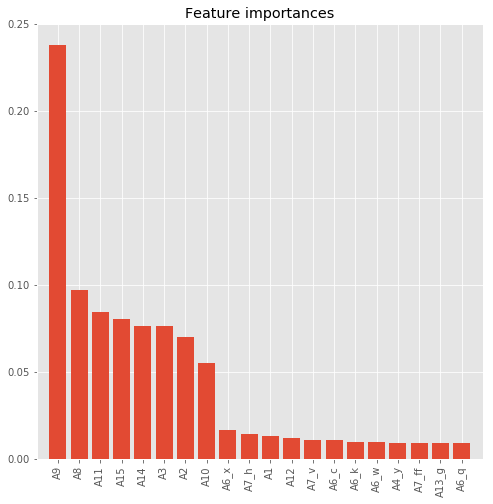

In [79]:
d_first = 20
plt.figure(figsize=(8, 8))
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [80]:
best_features = indices[:8]
best_features_names = feature_names[best_features]
print(best_features_names)

Index(['A9', 'A8', 'A11', 'A15', 'A14', 'A3', 'A2', 'A10'], dtype='object')


## GBT – градиентный бустинг деревьев решений¶

GBT – еще один метод, строящий ансамбль деревьев решений. На каждой итерации строится новый классификатор, аппроксимирующий значение градиента функции потерь.

In [81]:
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))
print (err_train, err_test)

0.0248447204969 0.101449275362




Ошибка на тестовой выборке (10.1%) чуть выше, чем для случайного леса.

Заметим, что при использовании найденных выше значимых признаков ошибка практически не меняется:


In [82]:
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(X_train[best_features_names], y_train)

err_train = np.mean(y_train != gbt.predict(X_train[best_features_names]))
err_test = np.mean(y_test != gbt.predict(X_test[best_features_names]))
print (err_train, err_test)

0.0351966873706 0.106280193237
